In [2]:
import pandas as pd
df = pd.read_csv("trazas_finales.csv", delimiter=',')

In [3]:
level_filtered = df[df['EventName'].str.contains('StartLevelEvent') | df['EventName'].str.contains('PlayerDeathEvent')]

levels_completed = len(level_filtered)

In [9]:
from collections import defaultdict

IDs_levels = defaultdict(list)
current_id = ''
current_levels = 0
firstTimestamp = 0
lastTimestamp = 0

for ind in level_filtered.index:
    a = str(level_filtered['Idpruebas'][ind])
    if a not in current_id:
        if current_levels != 0:
            IDs_levels[current_id] = (lastTimestamp - firstTimestamp) / current_levels
        current_id = a
        current_levels = 0
        firstTimestamp = int(level_filtered['Timestamp'][ind])
    
    b = str(level_filtered['EventName'][ind])
    if b in "StartLevelEvent":
        current_levels += 1
    elif b in "PlayerDeathEvent":
        lastTimestamp = int(level_filtered['Timestamp'][ind])

In [10]:
sin_dda = []
con_dda = []

casuals_con = []
casuals_sin = []

hardcores_con = []
hardcores_sin = []

casual_ids = [9, 7, 6, 4, 12]
hardcore_ids = [31,29,28,27,24,22,21,20,18,16]

for i in IDs_levels:
    if int(i)%2 == 0:
        con_dda.append(IDs_levels[i])
        if int(i) in casual_ids:
            casuals_con.append(IDs_levels[i])
        elif int(i) in hardcore_ids:
            hardcores_con.append(IDs_levels[i])
    else:
        sin_dda.append(IDs_levels[i])
        if int(i) in casual_ids:
            casuals_sin.append(IDs_levels[i])
        elif int(i) in hardcore_ids:
            hardcores_sin.append(IDs_levels[i])

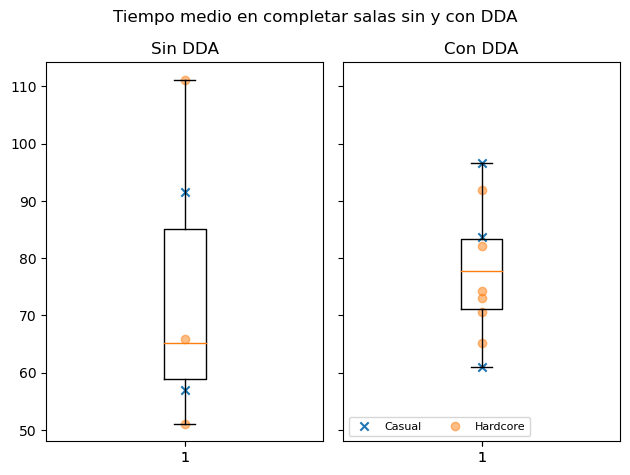

In [13]:
import matplotlib.pyplot as plt
import numpy as np

f, axs = plt.subplots(1, 2, sharey=True, sharex=True)
axs[0].boxplot(sin_dda)
x = np.ones(len(casuals_sin))
c_s = axs[0].scatter(x, casuals_sin, marker='x')
x = np.ones(len(hardcores_sin))
h_s = axs[0].scatter(x, hardcores_sin, alpha=0.5)
axs[0].set_title("Sin DDA")

axs[1].boxplot(con_dda)
x = np.ones(len(casuals_con))
c_c = axs[1].scatter(x, casuals_con, marker='x')
x = np.ones(len(hardcores_con))
h_c = axs[1].scatter(x, hardcores_con, alpha=0.5)
axs[1].set_title("Con DDA")

plt.tight_layout()

f.suptitle("Tiempo medio en completar salas sin y con DDA")
f.subplots_adjust(top=0.87)
plt.legend((c_s,h_s),
           ('Casual', 'Hardcore'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.savefig("Resultados/Tiempo_DDA.pdf", format="pdf", bbox_inches="tight")
plt.show()